# Trying to set out the framework for the worm algorithm
### In several places I have put things have 0 added to multiplied by 1 or returning 0. Most of these are just place holders so the code can run.


In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import random

# Set up H and $\beta$ and other fixed variables

In [24]:
something = 0
N = 2
mu = 1.4
num_time_steps = 10
beta = 12
epsilon = beta/num_time_steps

d = 3 #number of spacial dimension. Not actually fully flexible, but comes up in formulas
something = 0 #just used whenever I need a placeholder for incomplete code
p_move_foward = _np.exp(mu*epsilon) #the propability of moving forward in time given it is facing forward, either hop or staying
p_move_back = 1-_np.exp(mu*epsilon) #the probability of moving backwards giving the worm is facing backwards
p_move_hop = epsilon #propability of hopping given the worm is moving forward
p_move_forward_straight = 1-2*d*p_move_hop
weight_hop = min(p_move_foward,1)*(1-2*d*p_move_hop)
wieght_no_hop = min(p_move_foward, 1)*p_move_hop

class grid_location(object):
    """
    an object for holding information about what is going on at each grid location
    """
    def __init__(self):
        self.is_particle = False #whether or not there is a particle on that location.
        """for where_particle_came_from/is_going there are 2 numbers. The first is whether is moved in x(0)
        y(1) or z(2). The second (-1, 0, +1) is whether the previous/next position was 
        at the current cordinate, or +1 or -1 from it. For example a trajector that goes (in Cartesian)
        (3,4,5)-> (3,5,5)->(2,5,5) would have where_paricle_came_from = [2, 1] and 
        where_particle_is_going = [1, -1]
        Note if the particle is stationary where_particle_came_from = [0,0] or [1,0] or [2,0]. It doesn't matter"""
        self.where_particle_came_from = [0,0]
        self.where_particle_is_going = [0,0]

def oberservables(pathed_grid):
    """count up the number of particles and number of hops which gives all information needed to compute
    the weight and energy of the path, then returns the number of particles, the weight of the path and the energy"""
    num_particles = 0 #running total of number of particles
    num_hops = 0 #running total of number of steps in which those particles hop
    #loop through the grid
    for x in _np.arange(N):
        for y in _np.arange(N):
            for z in _np.arange(N):
                #for each end location check if there is a path
                time = num_time_steps-1 #start at the end time of the grid and work backwards
                loc = [x,y,z] #location in space only
                if pathed_grid[loc[0], loc[1], loc[2], time].is_particle:
                    num_particles += 1
                    #go through the path
                    while time>0:
                        step = pathed_grid[loc[0], loc[1], loc[2], time] #the grid_locaiton object where we are in path
                        if step.where_particle_came_from[1]!=0:
                            num_hops +=1
                        #update location to the previous step on the path
                        loc[step.where_particle_came_from[0]] = step.where_particle_came_from[1]
                        loc[step.where_particle_came_from[0]] %= N #isn't Python great that %= works just like += but for mod 
                        time -=1
    e_tilda = 2*d*num_particles-1/beta*num_hops
    weight = weight_hop**(num_hops)*wieght_no_hop**(num_time_steps*num_particles-num_hops)
    return [num_particles, e_tilda, weight]

"""
grid has indecies for time steps, x, y and z. Then at each grid location there is a grid_location object that says whether
there is a particle, where it came from and where it is going.
I think it is good to say where a particle came from each step because the worm algorithm only every  follows a path
backwards.
"""
grid = _np.full((N,N,N, num_time_steps), grid_location() )

# Grid visualization

In [78]:
def plot_grid(pathed_grid, t):
    """This is supposed to plot a 3d grid showing one time step. It should have a green dot at each point where there
    is a particle. There should also be a blue line from each particle to where it came from in the previous timestep,
    and a red line leading to where it is going on the next time step. Ideally this would eventually lead to an
    animated version where it shows each time step for ~1s.
    This is currently not working (at least in the edge case where there are not particles, or particles at every point.)
    """
    background_points = []
    particle_points = []
    particle_going_tos = []
    particle_coming_froms = []
    for x in range(N):
        for y in range(N):
            for z in range(N):
                current_location = pathed_grid[x,y,z,t]
                if not current_location.is_particle:
                    background_points.append([x,y,z])
                else:
                    loc = [x,y,z]
                    next_loc = loc.copy()
                    next_loc[current_location.where_particle_is_going[0]] += current_location.where_particle_is_going[1]
                    next_loc[current_location.where_particle_is_going[0]] %= N
                    previous_loc = loc.copy()
                    previous_loc[current_location.where_particle_came_from[0]] += current_location.where_particle_came_from[1]
                    previous_loc[current_location.where_particle_came_from[0]] %= N
                    particle_points.append(loc)
                    particle_going_tos.append(next_loc)
                    particle_coming_froms.append(previous_loc)
                    
                
    ax = _plt.axes(projection='3d')
    
    bp =_np.array(background_points).T
    print(background_points, bp)
    print(particle_points)
    
    ax.scatter(bp[0], bp[1], bp[2], color="grey", marker=".", alpha="0.5")
    ax.scatter(*_np.array(particle_points).T)
    for i in range(length(particle_points)):
        ax.plot(*_np.array([particle_going_tos[i], particle_points[i]]).T, color="red")
        ax.plot(*_np.array([particle_coming_froms[i], particle_points[i]]).T, color="blue")

[] []
[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


IndexError: index 0 is out of bounds for axis 0 with size 0

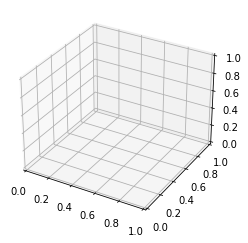

In [79]:
plot_grid(grid, 0)

In [63]:
[[0,1], [2,3]].tranpose()

AttributeError: 'list' object has no attribute 'tranpose'

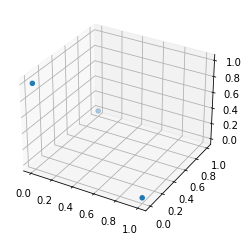

In [66]:
ax = _plt.axes(projection='3d')
ax.scatter3D(*_np.array([[0,0,1], [0,1,0], [1,0,0]]))

## This part is the actual worm algorithm

In [35]:
def move_forward(loc, pathed_grid):
    """
    This function updates the grid if the worm moves forward. It needs to do 3 things:
    1) choose a next location to go to
    2) update where_particle_is_going on the old location and where_particle_came_from on the new location
    3) deal with complications if there is already a particle at the location"""
    new_loc = loc.copy()
    #start by advancing the time
    new_loc[3] += 1
    new_loc[3] %= num_time_steps
    if random.uniform(0,1)<p_move_forward_straight:
        #don't hop, just move forward in time
        current_location = pathed_grid[tuple(loc)]
        new_going_to = [0,0] 
    else:
        #hop at this time step
        #get an integer 0-2 inclusive for the axis to move on and either +1=2*1-1
        #or -1=2*0-1 for the direction
        new_going_to = [random.randint(0,2), 2*random.getrandbits(1)-1]
    #now the spatial new location the partcile moves to
    new_loc[new_going_to[0]] = (new_loc[new_going_to[0]]+new_going_to[1])%N
    #update the old location to say where it is going
    pathed_grid[tuple(loc)].where_particle_is_going = new_going_to    
    if pathed_grid[tuple(new_loc)].is_particle:
        #now in the condition of at a spot with two particles and the arrow facing
        #down along the path that was previously there
        new_new_loc = new_loc.copy()
        new_grid_location = pathed_grid[tuple(new_loc)]
        new_new_loc[new_grid_location.where_particle_came_from[0]]+= new_grid_location.where_particle_came_from[1]
        new_new_loc[new_grid_location.where_particle_came_from[0]] %= N
        new_grid_location.where_particle_came_from = [new_going_to[0], -1*new_going_to[1]]
        if random.uniform(0,1)< p_move_back:
            #this is the simple case where we just move back along the path that was previously there 
            #then return to the main algorith with a worm at the new_new_location (back one step on the 
            #particle that was previously at the intersect location) with the worm facing down
            return new_new_loc, False
        else:
            #the more complicated case is where we have to move forward. But this is roughly equivalent
            #to being one step back with an arrow facing forward that we have already decided is going
            #to move forward
            return move_forward(new_new_loc, pathed_grid)
    else:
        #simple case where there is not already particle at the new location, just need to update
        #where that location is going and that there is a particle there
        pathed_grid[tuple(new_loc)].where_particle_came_from = [new_going_to[0], -1*new_going_to[1]]
        pathed_grid[tuple(new_loc)].is_particle = True
        return new_loc, True
        
            
def update_grid(pathed_grid):
    """
    worm update algorithm goes here
    """
    #pick initial site
    x0, y0, z0= random.randrange(N), random.randrange(N), random.randrange(N)
    t0 = random.randrange(num_time_steps)
    loc0 = [x0, y0, z0, t0] #original location
    #up arrow if there is no particle
    facing_forward = not(pathed_grid[tuple(loc0)].is_particle)
    #current location of the worm
    loc = [x0, y0, z0, t0]
    keep_going = True
    while keep_going:
        print("hi", loc, facing_forward)
        if facing_forward:
            if random.uniform(0,1)<=p_move_foward:
                loc, facing_forward = move_forward(loc, pathed_grid)
            else:
                facing_forward = False
        else:
            #for the case of the worm facing backwards     
            #for facing backwards the steps are as follows
            #1) go back one along the path, deleting the particle at the current location
            #2) switch the arrow to something like facing forward, except the probabilities of adding a new step
            #   are different
            pathed_grid[tuple(loc)].is_particle = False
            current_grid_location = pathed_grid[tuple(loc)]
            #go back along path, need %N to loop around and stay on the grid
            loc[current_grid_location.where_particle_came_from[0]] += current_grid_location.where_particle_came_from[1]
            loc[current_grid_location.where_particle_came_from[0]] %= N
            loc[3]+= -1
            loc[3] %= num_time_steps
            if random.uniform(0,1)>=p_move_back:
                loc, facing_forward = move_forward(loc, pathed_grid)
        #now check whether we have arrive back at the place we started
        #I don't think it is possible to arrive back at the start without having finished the worm
        keep_going = (loc== loc0) 
    return pathed_grid

# This next box is where the simulation acutally happens

In [80]:
num_trials = 4 #I think in one of the lecctures, prof said we should expect this ot take ~1 million trials
ns = [] #number of particles in each trial
es = [] #energy of path in each trial
Ws = [] #weight of paths in each trial
for counter in range(num_trials):
    #outdated
    num_particles, e_tilda, weight = oberservables(grid)
    Ws.append(weight)
    ns.append(num_particles)
    es.append(e_tilda)
    grid = update_grid(grid)
    
#I don't know why it is printing all these numbers   

[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
hi [0, 1, 0, 1] False
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 1]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0

In [81]:
print(ns, es, Ws)
#There might be bug where it always populates all the states. It could also just be that the probability of moving forward
#if the worm is facing forward is 1, so particles are only deleted if the worm starts by facing backwards and never
#goes forwar, which is probability something like 1/5^10 which is ~10 million

[8, 8, 8, 8] [42.0, 42.0, 42.0, 42.0] [4.848993615050053e+57, 4.848993615050053e+57, 4.848993615050053e+57, 4.848993615050053e+57]


In [83]:
print(p_move_foward)
print(p_move_back)


5.3655559711219745
-4.3655559711219745


# Now do analysis, plot results, etc

In [16]:
test1 = _np.array([1,2,3])
test2 = _np.array([2,3,4])
test1==test2
_np.all(test1==test2)

False

## Scratch Work

In [34]:
grid = _np.full((2,2), grid_location())
grid

array([[<__main__.grid_location object at 0x0000019ECB7C74E0>,
      dtype=object)

In [35]:
grid[0,0].is_particle

False

In [39]:
2*True-1

1

In [53]:
random.randint(0,2) 

0

In [64]:
random.getrandbits(1)

0

In [96]:
False==False

True

In [67]:
loc = [1,2,3]
new_loc = loc.copy()
new_loc[0]+=1
loc

[1, 2, 3]

In [68]:
new_loc

[2, 2, 3]

In [81]:
a = _np.array([[1,2],[3,4]])
b=(0,1)
b[0]+=1
a[tuple(b)]

TypeError: 'tuple' object does not support item assignment

In [93]:
a=[4, 5]
b=[4,5]
a==b

True